### Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

C:\Users\dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Dataset

In [2]:
from tensorflow.keras import datasets
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

### Shape of the Dataset

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[0]

array([6], dtype=uint8)

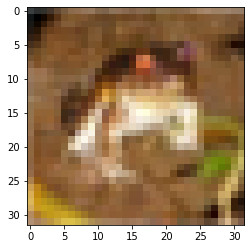

In [7]:
plt.imshow(x_train[0])

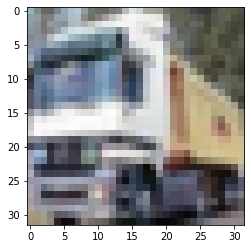

In [8]:
plt.imshow(x_train[1])

In [9]:
y_train=y_train.reshape(-1,)

In [10]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [39]:
label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def func(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(label[y[index]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


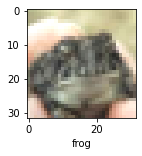

In [86]:
func(x_train,y_train,25)

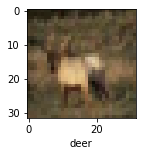

In [14]:
func(x_train,y_train,3)

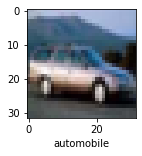

In [15]:
func(x_train,y_train,4)

### Normalise the Dataset

In [16]:
x_train=x_train/225
x_test=x_test/225

### CNN Model

In [17]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4533 - accuracy: 0.4771
Epoch 2/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0732 - accuracy: 0.6243
Epoch 3/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9528 - accuracy: 0.6682
Epoch 4/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8743 - accuracy: 0.6976
Epoch 5/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.8135 - accuracy: 0.7192
Epoch 6/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7631 - accuracy: 0.7367
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7158 - accuracy: 0.7523
Epoch 8/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6796 - accuracy: 0.7615
Epoch 9/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6372 - accuracy: 0.7780
Epoch 10/20
1563/1563 [==============================] - 33s 21m

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.2842 - accuracy: 0.6803


[1.284212589263916, 0.6802999973297119]

In [21]:
y_pred=model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [22]:
y_pred

array([[1.69401465e-04, 2.57075862e-06, 7.17563807e-07, ...,
        1.94426988e-07, 5.31953294e-04, 1.33984628e-07],
       [3.78628300e-07, 4.68197733e-01, 6.16485618e-09, ...,
        5.50986619e-18, 5.31764388e-01, 3.74952360e-05],
       [4.56941724e-02, 4.39506248e-02, 1.05367659e-03, ...,
        4.11671863e-06, 8.68678689e-01, 3.99896279e-02],
       ...,
       [6.66980000e-08, 1.46929402e-08, 1.03012356e-03, ...,
        9.90848639e-04, 4.23883897e-08, 7.48520301e-10],
       [3.81566882e-01, 5.66093445e-01, 8.27248732e-06, ...,
        1.19654396e-05, 2.29227386e-04, 8.48436201e-08],
       [4.22012425e-12, 2.56780486e-09, 6.78151713e-09, ...,
        9.98621821e-01, 2.35682735e-16, 1.20259835e-11]], dtype=float32)

In [49]:
label[np.argmax(y_pred[0])]

'cat'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


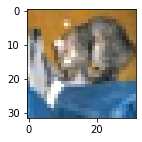

In [81]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[0])
plt.show()

In [79]:
label[np.argmax(y_pred[17])]

'horse'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


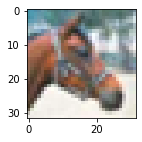

In [80]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[17])
plt.show()

In [66]:
label[np.argmax(y_pred[1])]

'ship'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


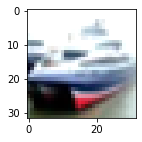

In [73]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[1])
plt.show()

In [68]:
label[np.argmax(y_pred[12])]

'dog'

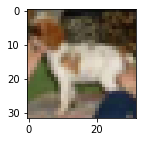

In [69]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[12])
plt.show()

In [70]:
label[np.argmax(y_pred[5])]

'frog'

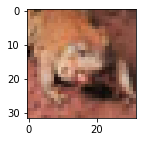

In [72]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[5])
plt.show()